## 1. Preparation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#input data
item_list_1_df = pd.read_csv(r'D:\How2Python\Lesson\Bai 6\4.5_predict_future_sales\predict_future_sales\items_list_1.csv')
item_list_1_df

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
13785,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
13786,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
13787,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
13788,Яйцо для Little Inu,22168,62


In [4]:
item_list_2_df = pd.read_csv(r'D:\How2Python\Lesson\Bai 6\4.5_predict_future_sales\predict_future_sales\items_list_2.csv')
item_list_2_df

,item_name,item_id,item_category_id
0,"1С:Биологический конструктор 1.5 [PC, Цифровая...",470,78
1,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,471,49
2,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,472,49
3,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,473,49
4,1С:Бухгалтерия 8 КОРП: учет в головной организ...,474,49
...,...,...,...
13743,Я-ЛЕГЕНДА WB (BD),22146,37
13744,Я-ЛЕГЕНДА WB (регион),22147,40
13745,Я-ЧЕТВЕРТЫЙ WD,22148,40
13746,Я-ЧЕТВЕРТЫЙ WD (регион),22149,40


In [5]:
item_categories_df = pd.read_csv(r'D:\How2Python\Lesson\Bai 6\4.5_predict_future_sales\predict_future_sales\item_categories.csv')
item_categories_df

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [6]:
sales_df = pd.read_csv(r'D:\How2Python\Lesson\Bai 6\4.5_predict_future_sales\predict_future_sales\sales.csv')
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [7]:
item_list_1_df.describe()

,item_id,item_category_id
count,13790.000000,13790.000000
mean,11773.628064,45.945323
std,6441.204046,15.068492
min,0.000000,0.000000
25%,6668.250000,37.000000
50%,13427.500000,40.000000
75%,16874.750000,58.000000
max,22169.000000,82.000000


In [9]:
item_list_1_df.shape

(13790, 3)

In [10]:
item_list_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13790 entries, 0 to 13789
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         13790 non-null  object
 1   item_id           13790 non-null  int64 
 2   item_category_id  13790 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 323.3+ KB


## 2. Solution

In [11]:
# How many items are there in list 1 and 2 
print(f'There are {len(item_list_1_df)} items in list 1') 
print(f'There are {len(item_list_2_df)} items in list 2')

There are 13790 items in list 1
There are 13748 items in list 2


In [12]:
# How many items are in only list 1 (List the name of them)? in only list 2 (List the name of them)? in both of the two lists (List the name of them)?

In [13]:
merged_df = pd.merge(item_list_1_df, item_list_2_df, \
                    on='item_id', how='outer', indicator=True)
merged_df

,item_name_x,item_id,item_category_id_x,item_name_y,item_category_id_y,_merge
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40.0,NaN,NaN,left_only
1,!ABBYY FineReader 12 Professional Edition Full...,1,76.0,NaN,NaN,left_only
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40.0,NaN,NaN,left_only
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40.0,NaN,NaN,left_only
4,***КОРОБКА (СТЕКЛО) D,4,40.0,NaN,NaN,left_only
...,...,...,...,...,...,...
22165,NaN,22146,NaN,Я-ЛЕГЕНДА WB (BD),37.0,right_only
22166,NaN,22147,NaN,Я-ЛЕГЕНДА WB (регион),40.0,right_only
22167,NaN,22148,NaN,Я-ЧЕТВЕРТЫЙ WD,40.0,right_only
22168,NaN,22149,NaN,Я-ЧЕТВЕРТЫЙ WD (регион),40.0,right_only


In [14]:
def process_df(_df):  
    _df = _df.dropna(axis=1).drop(columns='_merge') 
    
    rename_dict = dict()  
    for col_name in _df.columns:
        if '_x' in col_name or '_y' in col_name: 
            rename_dict[col_name] = col_name[:-2] 
    
    new_df = _df.rename(columns=rename_dict) 
    return new_df

In [15]:
item_only_list_1_df = merged_df[merged_df["_merge"] == 'left_only']
item_only_list_1_df = process_df(item_only_list_1_df)
item_only_list_1_df

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40.0
1,!ABBYY FineReader 12 Professional Edition Full...,1,76.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40.0
4,***КОРОБКА (СТЕКЛО) D,4,40.0
...,...,...,...
13785,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31.0
13786,Язык запросов 1С:Предприятия [Цифровая версия],22166,54.0
13787,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49.0
13788,Яйцо для Little Inu,22168,62.0


In [16]:
item_only_list_2_df = merged_df[merged_df["_merge"] == 'right_only']
item_only_list_2_df = process_df(item_only_list_2_df)
item_only_list_2_df

,item_id,item_name,item_category_id
13790,474,1С:Бухгалтерия 8 КОРП: учет в головной организ...,49.0
13791,475,1С:Бухгалтерия 8 ПРОФ на 5 польз. Поставка для...,73.0
13792,476,1С:Бухгалтерия 8 ПРОФ на 5 польз. Поставка для...,73.0
13793,477,1С:Бухгалтерия 8 ПРОФ. Поставка для розничного...,73.0
13794,478,1С:Бухгалтерия 8 ПРОФ. Поставка для розничного...,73.0
...,...,...,...
22165,22146,Я-ЛЕГЕНДА WB (BD),37.0
22166,22147,Я-ЛЕГЕНДА WB (регион),40.0
22167,22148,Я-ЧЕТВЕРТЫЙ WD,40.0
22168,22149,Я-ЧЕТВЕРТЫЙ WD (регион),40.0


In [17]:
item_both_list_df = merged_df[merged_df["_merge"] == 'both']
item_both_list_df = process_df(item_both_list_df)
item_both_list_df = item_both_list_df.loc[:,~item_both_list_df.columns.duplicated()]
item_both_list_df

,item_name,item_id,item_category_id
470,"1С:Биологический конструктор 1.5 [PC, Цифровая...",470,78.0
471,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,471,49.0
472,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,472,49.0
473,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,473,49.0
474,"1С:Школа. Химия, 8 кл.",920,77.0
...,...,...,...
13766,Футболка Minecraft Powered by Redstone черная S,21183,61.0
13767,Футболка Minecraft Run Away черная L,21184,61.0
13768,Футболка Minecraft Run Away черная M,21185,61.0
13769,Футболка Minecraft Run Away черная S,21186,61.0


In [18]:
print(f'There are {len(item_only_list_1_df)} items in only list 1')
print(f'There are {len(item_only_list_2_df)} items in only list 2')
print(f'There are {len(item_both_list_df)} items in both list 1 and list 2')

There are 8422 items in only list 1
There are 8380 items in only list 2
There are 5368 items in both list 1 and list 2


In [19]:
# Create the new csv file only contains the unique items from the two lists?

In [20]:
items_df = pd.concat([item_only_list_1_df, item_only_list_2_df, item_both_list_df])
items_df.to_csv('items.csv', index=False)
items_df

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40.0
1,!ABBYY FineReader 12 Professional Edition Full...,1,76.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40.0
4,***КОРОБКА (СТЕКЛО) D,4,40.0
...,...,...,...
13766,Футболка Minecraft Powered by Redstone черная S,21183,61.0
13767,Футболка Minecraft Run Away черная L,21184,61.0
13768,Футболка Minecraft Run Away черная M,21185,61.0
13769,Футболка Minecraft Run Away черная S,21186,61.0


In [21]:
# How many items are there in the items.csv?
print(f'There are {len(items_df)} items in items.csv')

There are 22170 items in items.csv


In [23]:
# How many of them contain digits in name?
def check_digits(name):
    for char in name:
        if char.isdigit():
            return True
    return False

In [24]:
items_df['is_digits_in_name'] = items_df["item_name"].apply(check_digits)
items_df

,item_name,item_id,item_category_id,is_digits_in_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40.0,False
1,!ABBYY FineReader 12 Professional Edition Full...,1,76.0,True
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40.0,False
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40.0,False
4,***КОРОБКА (СТЕКЛО) D,4,40.0,False
...,...,...,...,...
13766,Футболка Minecraft Powered by Redstone черная S,21183,61.0,False
13767,Футболка Minecraft Run Away черная L,21184,61.0,False
13768,Футболка Minecraft Run Away черная M,21185,61.0,False
13769,Футболка Minecraft Run Away черная S,21186,61.0,False


In [25]:
item_name_with_digits_df = items_df.loc[items_df['is_digits_in_name']]
item_name_with_digits_df 

,item_name,item_id,item_category_id,is_digits_in_name
1,!ABBYY FineReader 12 Professional Edition Full...,1,76.0,True
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40.0,True
18,/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/ D,18,40.0,True
19,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,19,40.0,True
20,/ОДНАЖДЫ В КИТАЕ-2,20,40.0,True
...,...,...,...,...
13731,Футболка Mass Effect 3 Special Forces серая M,21148,61.0,True
13732,Футболка Mass Effect 3 Special Forces серая S,21149,61.0,True
13733,Футболка Mass Effect 3 Take Earth Back синяя M,21150,61.0,True
13746,Футболка Metal Gear Solid 5 FOX Black M,21163,61.0,True


In [26]:
print(f'There are {len(item_name_with_digits_df)} items with digits in item_name')

There are 11158 items with digits in item_name


In [27]:
# How many item categories are there in the dataset?
# Which item category contain highest number of items? lowest number of items? List all items according to each item category. Calculate the average number of items in each category.

In [28]:
print(f'There are {len(item_categories_df)} categories in the dataset')

There are 84 categories in the dataset


In [30]:
merged_item_cat_df = pd.merge(items_df, item_categories_df, how='left', on='item_category_id')
merged_item_cat_df

,item_name,item_id,item_category_id,is_digits_in_name,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40.0,False,Кино - DVD
1,!ABBYY FineReader 12 Professional Edition Full...,1,76.0,True,Программы - Для дома и офиса (Цифра)
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40.0,False,Кино - DVD
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40.0,False,Кино - DVD
4,***КОРОБКА (СТЕКЛО) D,4,40.0,False,Кино - DVD
...,...,...,...,...,...
22165,Футболка Minecraft Powered by Redstone черная S,21183,61.0,False,Подарки - Атрибутика
22166,Футболка Minecraft Run Away черная L,21184,61.0,False,Подарки - Атрибутика
22167,Футболка Minecraft Run Away черная M,21185,61.0,False,Подарки - Атрибутика
22168,Футболка Minecraft Run Away черная S,21186,61.0,False,Подарки - Атрибутика


In [32]:
grouped_merged_item_cat_df = merged_item_cat_df.groupby(
    by=['item_category_id', 'item_category_name']).agg({'item_id': list}).reset_index()
grouped_merged_item_cat_df

,item_category_id,item_category_name,item_id
0,0.0,PC - Гарнитуры/Наушники,"[5441, 16255, 16256, 16257]"
1,1.0,Аксессуары - PS2,"[5606, 5740]"
2,2.0,Аксессуары - PS3,"[13069, 13070, 13411, 13414, 13456, 13459, 135..."
3,3.0,Аксессуары - PS4,"[13071, 5652, 5653, 5654, 5655, 5656, 5657, 56..."
4,4.0,Аксессуары - PSP,"[3111, 13101, 13102, 3666, 3667, 3668, 3669, 5..."
...,...,...,...
79,79.0,Служебные,[17717]
80,80.0,Служебные - Билеты,"[9244, 9246, 9248, 9250, 9252, 9254]"
81,81.0,Чистые носители (шпиль),"[13346, 13347, 13349, 13352, 13355, 13356, 13358]"
82,82.0,Чистые носители (штучные),"[13344, 13345, 13348, 13350, 13351, 13353, 133..."


In [33]:
grouped_merged_item_cat_df.columns

Index(['item_category_id', 'item_category_name', 'item_id'], dtype='object')

In [34]:
grouped_merged_item_cat_df['num_of_items'] = grouped_merged_item_cat_df['item_id'].apply(len)
grouped_merged_item_cat_df

,item_category_id,item_category_name,item_id,num_of_items
0,0.0,PC - Гарнитуры/Наушники,"[5441, 16255, 16256, 16257]",4
1,1.0,Аксессуары - PS2,"[5606, 5740]",2
2,2.0,Аксессуары - PS3,"[13069, 13070, 13411, 13414, 13456, 13459, 135...",75
3,3.0,Аксессуары - PS4,"[13071, 5652, 5653, 5654, 5655, 5656, 5657, 56...",34
4,4.0,Аксессуары - PSP,"[3111, 13101, 13102, 3666, 3667, 3668, 3669, 5...",15
...,...,...,...,...
79,79.0,Служебные,[17717],1
80,80.0,Служебные - Билеты,"[9244, 9246, 9248, 9250, 9252, 9254]",6
81,81.0,Чистые носители (шпиль),"[13346, 13347, 13349, 13352, 13355, 13356, 13358]",7
82,82.0,Чистые носители (штучные),"[13344, 13345, 13348, 13350, 13351, 13353, 133...",8


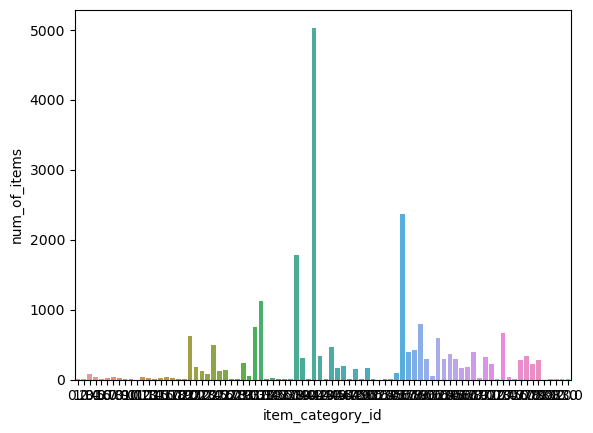

In [59]:

sns.barplot(data=grouped_merged_item_cat_df, x='item_category_id', y='num_of_items');

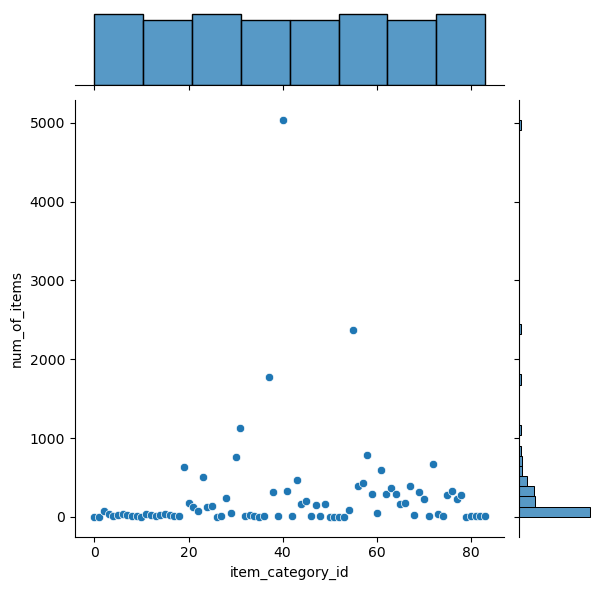

In [61]:
sns.jointplot(data=grouped_merged_item_cat_df, x='item_category_id', y='num_of_items');

In [35]:
grouped_merged_item_cat_df[grouped_merged_item_cat_df["num_of_items"] == np.max(grouped_merged_item_cat_df["num_of_items"])]

,item_category_id,item_category_name,item_id,num_of_items
40,40.0,Кино - DVD,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...",5035


In [36]:
max_num_of_items_df = grouped_merged_item_cat_df[
    grouped_merged_item_cat_df["num_of_items"] == np.max(grouped_merged_item_cat_df["num_of_items"])]
max_num_of_items_df

,item_category_id,item_category_name,item_id,num_of_items
40,40.0,Кино - DVD,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...",5035


In [38]:
min_num_of_items_df = grouped_merged_item_cat_df[
    grouped_merged_item_cat_df["num_of_items"] == np.min(grouped_merged_item_cat_df["num_of_items"])]
min_num_of_items_df

,item_category_id,item_category_name,item_id,num_of_items
10,10.0,Игровые консоли - PS2,[6669],1
51,51.0,Книги - Познавательная литература,[17703],1
79,79.0,Служебные,[17717],1


In [39]:
print(f'Average number of items {np.average(grouped_merged_item_cat_df["num_of_items"])}')

Average number of items 263.92857142857144


In [40]:
# Which item has the highest price in each year? Which item has the lowest price in each year? Calculate the average price of each item in each year?

In [41]:
sales_item_name_df = pd.merge(sales_df, items_df, on='item_id', how='left')
sales_item_name_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,is_digits_in_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37.0,True
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58.0,False
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58.0,False
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58.0,False
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56.0,True
...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55.0,False
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55.0,True
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55.0,True
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57.0,True


In [42]:
sales_item_name_df["date"] = sales_item_name_df["date"].apply(lambda x: x.split('.')[-1])
sales_item_name_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,is_digits_in_name
0,2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37.0,True
1,2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58.0,False
2,2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58.0,False
3,2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58.0,False
4,2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56.0,True
...,...,...,...,...,...,...,...,...,...
2935844,2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55.0,False
2935845,2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55.0,True
2935846,2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55.0,True
2935847,2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57.0,True


In [43]:
def find_highest_lowest_price(df, year):
    sales_year_df = df[df.date == year]
    highest_df = sales_year_df[sales_year_df["item_price"] == np.max(sales_year_df["item_price"])]
    lowest_df = sales_year_df[sales_year_df["item_price"] == np.min(sales_year_df["item_price"])]
    average_price = np.average(sales_year_df["item_price"])
    return highest_df, lowest_df, average_price

In [44]:
year_list = sales_item_name_df["date"].unique()
year_list

array(['2013', '2014', '2015'], dtype=object)

In [45]:
price = dict()
for year in year_list:
    highest_df, lowest_df, average_price = find_highest_lowest_price(sales_item_name_df, year)
    price[year] = dict()
    price[year]['highest'] = highest_df
    price[year]['lowest'] = lowest_df
    price[year]['average_price'] = average_price

In [46]:
price

{'2013': {'highest':          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
  1163158  2013              11       12     6066    307980.0           1.0   
  
                      item_name  item_category_id  is_digits_in_name  
  1163158  Radmin 3  - 522 лиц.              75.0               True  ,
  'lowest':         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
  484683  2013               4       32     2973        -1.0           1.0   
  
                                          item_name  item_category_id  \
  484683  DmC Devil May Cry [PS3, русские субтитры]              19.0   
  
          is_digits_in_name  
  484683               True  ,
  'average_price': 726.7978012088067},
 '2014': {'highest':          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
  1488135  2014              14       25    13199     50999.0           1.0   
  
                                         item_name  item_category_id  \
  14881

In [47]:
price['2015']['lowest']

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,is_digits_in_name
2909818,2015,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),9.0,False


In [48]:
price['2013']['lowest']

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,is_digits_in_name
484683,2013,4,32,2973,-1.0,1.0,"DmC Devil May Cry [PS3, русские субтитры]",19.0,True


In [49]:
price['2013']['average_price']

726.7978012088067

In [50]:
# Which item has the highest sales in each year? </br> Which item has the lowest sales in each year? </br> Calculate the average sales of each item in each year? 

In [51]:
sales_item_name_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,is_digits_in_name
0,2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37.0,True
1,2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58.0,False
2,2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58.0,False
3,2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58.0,False
4,2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56.0,True
...,...,...,...,...,...,...,...,...,...
2935844,2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55.0,False
2935845,2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55.0,True
2935846,2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55.0,True
2935847,2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57.0,True


In [52]:
def find_highest_lowest_sales(df, year):
    sales_year_df = df[df.date == year]
    grouped_df = sales_year_df.groupby(by='item_id').agg({'item_cnt_day': sum}).reset_index()

    highest_df = grouped_df[grouped_df["item_cnt_day"] == np.max(grouped_df["item_cnt_day"])]
    lowest_df = grouped_df[grouped_df["item_cnt_day"] == np.min(grouped_df["item_cnt_day"])]
    average_sales = np.average(grouped_df["item_cnt_day"])
    
    return highest_df, lowest_df, average_sales


In [53]:
sales = dict()
for year in year_list:
    highest_df, lowest_df, average_sales = find_highest_lowest_sales(sales_item_name_df, year)
    sales[year] = dict()
    sales[year]['highest'] = highest_df
    sales[year]['lowest'] = lowest_df
    sales[year]['average_sales'] = average_sales

In [54]:
sales['2013']['highest']

,item_id,item_cnt_day
14203,20949,63748.0


In [55]:
sales['2014']['highest']

,item_id,item_cnt_day
13410,20949,85288.0


In [56]:
sales['2014']['lowest']

,item_id,item_cnt_day
7171,11367,-5.0
